##  Segunda Análise Regressivo Simbólica da Solução do Poço quadrado de Potencial Infinito 

## Via da Independência Temporal...

## A equação de Schrödinger:
## $$\hat H\psi(x)=E\psi(x)$$ 

Primeiras energias (autovalores):
[  9.48183451  37.91816499  85.28148111 151.52596194 236.5875202 ]


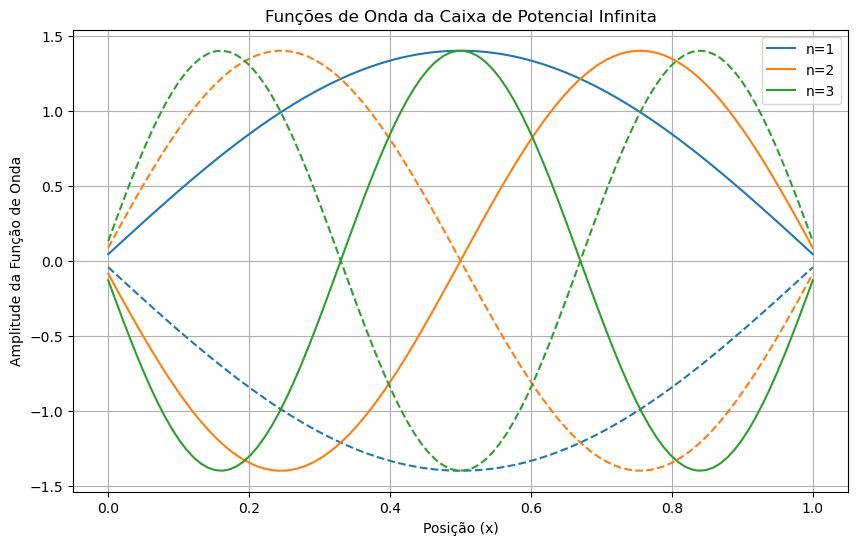

In [8]:
import numpy as np
import matplotlib.pyplot as plt

L = 1.0  # Comprimento da caixa
N = 100  # Número de pontos de discretização


x = np.linspace(0, L, N)
dx = x[1] - x[0] # Passo espacial

# Matriz Hamiltoniana (H = T + V)
# T: Termo de energia cinética (segunda derivada)
# V: Termo de energia potencial

main_diag = 2 * np.ones(N) / dx**2
off_diag = -1 * np.ones(N-1) / dx**2

H = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1)

# --- Solução da Equação de Schrödinger Independente do Tempo ---
# H * psi = E * psi
# Encontrar autovalores (E) e autovetores (psi)
autovalores, autovetores = np.linalg.eig(H)

idx_ordenado = np.argsort(autovalores)
autovalores_ordenados = autovalores[idx_ordenado]
autovetores_ordenados = autovetores[:, idx_ordenado]

for i in range(len(autovalores_ordenados)):
    autovetores_ordenados[:, i] = autovetores_ordenados[:, i] / np.sqrt(np.trapezoid(autovetores_ordenados[:, i]**2, x))

print("Primeiras energias (autovalores):")
print(autovalores_ordenados[:5])

plt.figure(figsize=(10, 6))

for i in range(3): 
    plt.plot(x, autovetores_ordenados[:, i], label=f'n={i+1}')
    plt.plot(x, -autovetores_ordenados[:, i], '--', color=plt.gca().lines[-1].get_color()) # Adicionar o reflexo para visualizar a forma
y=autovetores_ordenados[:, 1]
plt.title('Funções de Onda da Caixa de Potencial Infinita')
plt.xlabel('Posição (x)')
plt.ylabel('Amplitude da Função de Onda')
plt.legend()
plt.grid(True)
plt.show()

##  Biblioteca GPlearn 

In [9]:
import sklearn
from gplearn.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sympy import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.utils.random import check_random_state
import graphviz

In [10]:
# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Método Regressivo Simbólico da Biblioteca GPlearn.

In [11]:
# 3. Initialize and train the SymbolicRegressor
# You can customize functions, population size, generations, etc.

converter = {
    'sub': lambda x, y : x - y,
    'div': lambda x, y : x/y,
    'mul': lambda x, y : x*y,
    'add': lambda x, y : x + y,
    'neg': lambda x    : -x,
    'pow': lambda x, y : x**y,
    'sin': lambda x    : sin(x),
    'cos': lambda x    : cos(x),
    'inv': lambda x: 1/x,
    'sqrt': lambda x: x**0.5,
    'pow3': lambda x: x**3
}



function_set = ['add', 'sub', 'mul', 'div','cos','sin','neg','inv']


est_gp = SymbolicRegressor(population_size=5000,
                           generations=20,
                           tournament_size=20,
                           stopping_criteria=0.01, # Stop if R^2 reaches this value
                           function_set=function_set,
                           parsimony_coefficient=0.01, # Penalty for complex equations
                           random_state=0,
                           verbose=1)


## Método de calibração, via treinamento

In [12]:
est_gp.fit(X_train.reshape(-1,1), y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.94          20.5248       14         0.402382              N/A      1.48m
   1     7.70          1.60173       10         0.326484              N/A      1.59m
   2     7.54          1.38521       14         0.271577              N/A      1.39m
   3     8.50          1.73107       18          0.25524              N/A      1.19m
   4     9.64           1.1572       13          0.24682              N/A      1.16m
   5    11.15          1.06348       13          0.24682              N/A      1.00m
   6    11.51          1.00589       22         0.225671              N/A     59.14s
   7    11.38         0.973815       24         0.204731              N/A     55.98s
   8    11.76           1.0428       16         0.235448              N/A  

SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'cos', 'sin', 'neg',
                                'inv'],
                  parsimony_coefficient=0.01, population_size=5000,
                  random_state=0, stopping_criteria=0.01, verbose=1)

In [13]:
# 4. Evaluate the model
y_pred = est_gp.predict(X_test.reshape(-1,1))
print(f"R^2 score on test data: {r2_score(y_test, y_pred):.4f}")

# 5. Print the discovered equation
print(f"Discovered equation: {est_gp._program}")

next_e_funcao=sympify(str(est_gp._program), locals=converter)
next_e_funcao

R^2 score on test data: 0.8310
Discovered equation: mul(inv(0.674), cos(mul(inv(-0.318), cos(add(X0, X0)))))


1.48367952522255*cos(3.14465408805031*cos(2*X0))

## Bibioteca PYSR

In [14]:
import pysr

In [15]:
equations = pysr.PySRRegressor(
    niterations=5,
    binary_operators=["+", "*"],  # operators that can combine two terms
    unary_operators=["sin"],  # operators that modify a single term
)
equations.fit(X_train.reshape(-1,1), y_train)

C:\Users\USER\anaconda3\Lib\site-packages\pysr\sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
Compiling Julia backend...
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           8.337e-01  0.000e+00  y = x₀
2           8.307e-01  3.511e-03  y = sin(x₀)
3           5.887e-01  3.444e-01  y = x₀ + -0.49494
4           8.066e-02  1.988e+00  y = sin(x₀ * -6.1959)
6           7.300e-02  4.992e-02  y = sin((x₀ + -0.49755) * 5.8829)
7           7.292e-02  1.078e-03  y = sin(5.8828 * sin(-0.49753 + x₀))
9           4.760e-02  2.133e-01  y = sin(sin((x₀ + -0.49753) * 5.8828)) * 1.2341
12          3.611e-09  5.465e+00  y = sin(x₀ + ((x₀ + (x₀ * 4.1586)) + -3.0793)) * 1.4002
14          1.068e-09  6.090e-01  y = sin((x₀ + -3.2923) + ((x₀ + (x₀ * 4.1587)) + 0.21301))...
                                       * 1.4002
───────────────────────────────────────────────────────────────────────────────────────────────────
  - outputs\20250915_133028_79ocBX\hall_of_fame.csv


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                                 x0   
	1        0.003511                                            sin(x0)   
	2        0.344443                                   x0 + -0.49494183   
	3        1.987582                               sin(x0 * -6.1959267)   
	4        0.049920                  sin((x0 + -0.4975508) * 5.882884)   
	5        0.001078              sin(5.882768 * sin(-0.49753174 + x0))   
	6        0.213325  sin(sin((x0 + -0.49753174) * 5.882768)) * 1.23...   
	7        5.464764  sin(x0 + ((x0 + (x0 * 4.1585655)) + -3.0792732...   
	8  >>>>  0.608990  sin((x0 + -3.2923305) + ((x0 + (x0 * 4.158689)...   
	
	           loss  complexity  
	0  8.336668e-01           1  
	1  8.307452e-01           2  
	2  5.886787e-01           3  
	3  8.066451e-02           4  
	4  7.300001e-02           6  
	5  7.292136e-02           7  
	6  4.759515e-02           9  
	7  3.610872e-09          12  
	8  1.068194e-09          14  
]

In [16]:
def round_expr(expr, num_digits=4):
    return expr.xreplace({n: round(n, num_digits) for n in expr.atoms(Number)})

In [17]:
round_expr(equations.sympy())

1.4002*sin(6.1587*x0 - 3.0793)

In [18]:
equations.equations_

,complexity,loss,equation,score,sympy_format,lambda_format
0,1,8.336668e-01,x0,0.000000,x0,PySRFunction(X=>x0)
1,2,8.307452e-01,sin(x0),0.003511,sin(x0),PySRFunction(X=>sin(x0))
2,3,5.886787e-01,x0 + -0.49494183,0.344443,x0 - 0.49494183,PySRFunction(X=>x0 - 0.49494183)
3,4,8.066451e-02,sin(x0 * -6.1959267),1.987582,sin(x0*(-6.1959267)),PySRFunction(X=>sin(x0*(-6.1959267)))
4,6,7.300001e-02,sin((x0 + -0.4975508) * 5.882884),0.049920,sin((x0 - 0.4975508)*5.882884),PySRFunction(X=>sin((x0 - 0.4975508)*5.882884))
5,7,7.292136e-02,sin(5.882768 * sin(-0.49753174 + x0)),0.001078,sin(5.882768*sin(x0 - 0.49753174)),PySRFunction(X=>sin(5.882768*sin(x0 - 0.497531...
6,9,4.759515e-02,sin(sin((x0 + -0.49753174) * 5.882768)) * 1.23...,0.213325,sin(sin((x0 - 0.49753174)*5.882768))*1.234122,PySRFunction(X=>sin(sin((x0 - 0.49753174)*5.88...
7,12,3.610872e-09,sin(x0 + ((x0 + (x0 * 4.1585655)) + -3.0792732...,5.464764,sin(x0 + x0 + x0*4.1585655 - 3.0792732)*1.400171,PySRFunction(X=>sin(x0 + x0 + x0*4.1585655 - 3...
8,14,1.068194e-09,sin((x0 + -3.2923305) + ((x0 + (x0 * 4.158689)...,0.608990,sin(x0 + x0 + x0*4.158689 - 3.2923305 + 0.2130...,PySRFunction(X=>sin(x0 + x0 + x0*4.158689 - 3....


In [19]:
equations.equations_.loss

0    8.336668e-01
1    8.307452e-01
2    5.886787e-01
3    8.066451e-02
4    7.300001e-02
5    7.292136e-02
6    4.759515e-02
7    3.610872e-09
8    1.068194e-09
Name: loss, dtype: float64

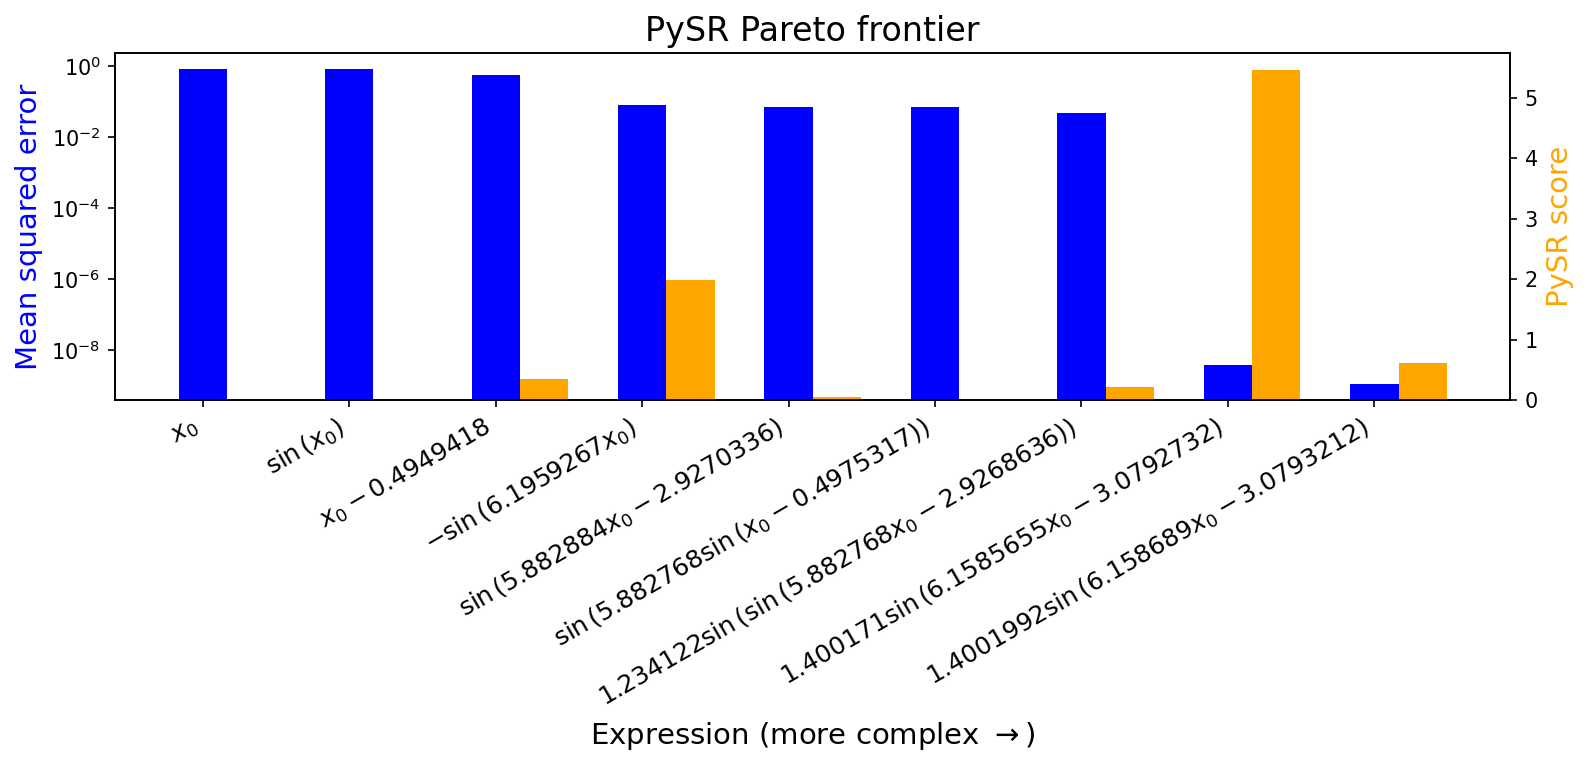

In [20]:
plt.figure(figsize=(12, 3), dpi=150)
plt.bar(
    np.arange(len(equations.equations_)),
    equations.equations_.loss,
    width=0.33,
    color="blue",
)


plt.yscale("log")
plt.ylabel("Mean squared error", fontsize=14, color="blue")
plt.xticks(
    range(len(equations.equations_)),
    [f"${latex(round_expr(v,7))}$" for v in equations.equations_.sympy_format],
    rotation=30,
    ha="right",
    fontsize=12,
)
plt.title("PySR Pareto frontier", fontsize=16)
plt.xlabel("Expression (more complex $\\to$)", fontsize=14)

ax2 = plt.twinx()
ax2.bar(
    np.arange(len(equations.equations_)) + 0.33,
    equations.equations_.score,
    width=0.33,
    color="orange",
)
ax2.set_ylabel("PySR score", color="orange", fontsize=14)

plt.show()